In [1]:
import os
import sys
sys.path.append("../")
import serial
import callisto
import subprocess
import shlex
import socket

## Managing Callisto

Instantiate the classes to handle callisto spectrometer and its calibration unit. Check the code to see possible parameters, they are fairly customizable.

In [ ]:
cal_unit = callisto.CalibrationUnit(tty="/dev/ttyACM0")
Callisto = callisto.Callisto(PORT=6789, cal_unit=cal_unit)

Several function to handle individual stuff. One may:
- start or stop daemon service registered in `systemd`
- `run` callisto binary with CFG file specified.
- `do` actions communicates via tcp.
- `cal_unit.check` if arduino interface is up and running.
- `cal_unit.set_relay` to set a specific position of the relay in calibration unit.

All other methods are combinations of these.

In [ ]:
Callisto.get_ip().IP
Callisto.get_PID()
Callisto.cal_unit.check()
Callisto.stop()
Callisto.run_daemon(action="stop")
Callisto.run("WARM")
Callisto.do("overview")
Callisto.record_ovs("COLD")
Callisto.record_fits("HOT")

In [ ]:
Callisto._calibrate("HOT")

In [ ]:
Callisto.calibrate()

## Visualizando

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_table("../data/OVS_UIRAPURU_20220417_162509.prn", sep=";")
df1.columns = ["Frequency[MHz]", "S[mV]"]
df2 = pd.read_table("../data/OVS_UIRAPURU_20220417_162222.prn", sep=";")
df2.columns = ["Frequency[MHz]", "S[mV]"]
df3 = pd.read_table("../data/OVS_UIRAPURU_20220417_164713.prn", sep=";")
df3.columns = ["Frequency[MHz]", "S[mV]"]

df1["Frequency[MHz]"] = 1760 - df1["Frequency[MHz]"]
df2["Frequency[MHz]"] = 1760 - df2["Frequency[MHz]"]
df3["Frequency[MHz]"] = 1760 - df3["Frequency[MHz]"]

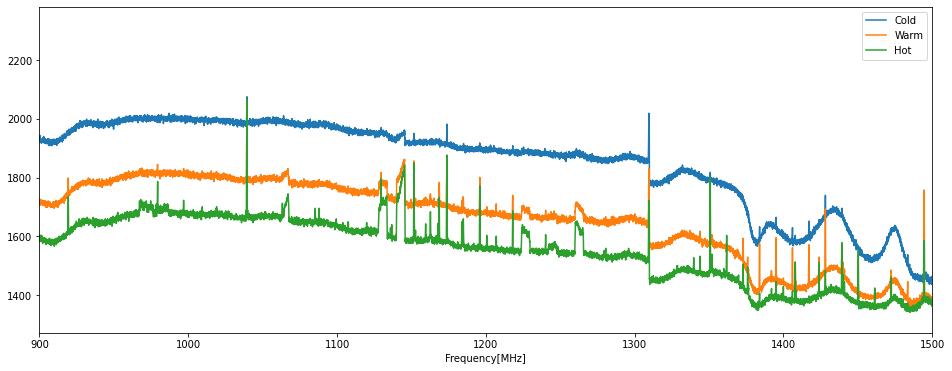

In [11]:
fig, ax = plt.subplots(figsize = (16,6))
df1.plot("Frequency[MHz]", "S[mV]", ax = ax, label = "Cold")
df2.plot("Frequency[MHz]", "S[mV]", ax = ax, label = "Warm")
df3.plot("Frequency[MHz]", "S[mV]", ax = ax, label = "Hot")
ax.set_xlim([900, 1500])
plt.show();

In [7]:
from astropy.io import fits
import numpy as np
hdul_3 = fits.open("../data/UIRAPURU_20220417_162612_03.fit")
hdul_2 = fits.open("../data/UIRAPURU_20220417_162325_02.fit")
hdul_1 = fits.open("../data/UIRAPURU_20220417_162037_01.fit")
hdul_0 = fits.open("../data/UIRAPURU_20220417_162754_59.fit")
data = np.hstack([hdul_1[0].data, hdul_2[0].data, hdul_3[0].data, hdul_0[0].data])
df = pd.DataFrame(data)

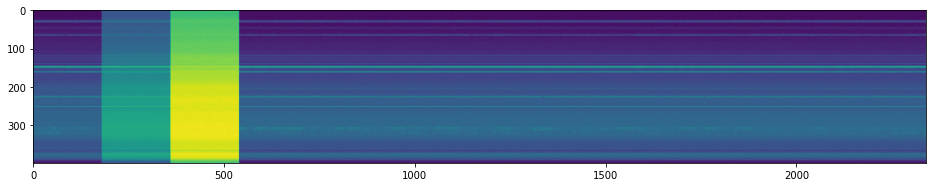

In [8]:
fig, ax = plt.subplots(figsize = (16,6))
plt.imshow(df)
plt.show();